In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch
from sklearn.model_selection import train_test_split
import pandas as pd

try:
    data = pd.read_csv("Training_Essay_Data.csv")
except pd.errors.ParserError as e:
    print("ParserError:", e)
data

,text,generated
0,Car-free cities have become a subject of incre...,1
1,"Car Free Cities Car-free cities, a concept ga...",1
2,A Sustainable Urban Future Car-free cities ...,1
3,Pioneering Sustainable Urban Living In an e...,1
4,The Path to Sustainable Urban Living In an ...,1
...,...,...
29140,There has been a fuss about the Elector Colleg...,0
29141,Limiting car usage has many advantages. Such a...,0
29142,There's a new trend that has been developing f...,0
29143,As we all know cars are a big part of our soci...,0


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer
import tensorflow as tf

try:
    data = pd.read_csv("Training_Essay_Data.csv")
except pd.errors.ParserError as e:
    print("ParserError:", e)

data['generated'] = data['generated'].astype(int)

train_texts, val_texts, train_labels, val_labels = train_test_split(data['text'], data['generated'], test_size=0.2, random_state=42)

model_name = "distilbert-base-uncased"  # Example model, you can choose any LLM model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = TFAutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)  # 2 classes: AI-generated or human-generated

train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True)
val_encodings = tokenizer(val_texts.tolist(), truncation=True, padding=True)

train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_labels)).batch(8)
val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings), val_labels)).batch(8)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_dataset, validation_data=val_dataset, epochs=3, batch_size=8)

loss, accuracy = model.evaluate(val_dataset)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Epoch 1/3


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2915/2915 [==============================] - 437s 134ms/step - loss: 0.6787 - accuracy: 0.5947 - val_loss: 0.6720 - val_accuracy: 0.6071
Epoch 2/3
2915/2915 [==============================] - 363s 124ms/step - loss: 0.6746 - accuracy: 0.5991 - val_loss: 0.6704 - val_accuracy: 0.6071
Epoch 3/3
729/729 [==============================] - 30s 42ms/step - loss: 0.6710 - accuracy: 0.6071
Validation Loss: 0.670961320400238
Validation Accuracy: 0.6071367263793945


In [7]:
!pip install transformers datasets
!pip install accelerate
!pip install transformers[torch]

import pandas as pd
from datasets import Dataset
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, TrainingArguments, Trainer
from transformers import AutoModelForSequenceClassification

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 7.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x8

In [1]:
!pip install transformers datasets

from datasets import Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, TrainingArguments, Trainer
from transformers import AutoModelForSequenceClassification

data = pd.read_csv('/content/Training_Essay_Data.csv')

train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

train_dataset = Dataset.from_pandas(train_data)
val_dataset = Dataset.from_pandas(val_data)

model_checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

def tokenize_function(examples):
    result = tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512)
    result["labels"] = list(examples["generated"])
    return result

tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True, remove_columns=['text', 'generated'])
tokenized_val_dataset = val_dataset.map(tokenize_function, batched=True, remove_columns=['text', 'generated'])

model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=2)

training_args = TrainingArguments(
    output_dir="/content/results",
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="/content/logs",
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_val_dataset,
    tokenizer=tokenizer
)

trainer.train()

trainer.evaluate()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Map:   0%|          | 0/23316 [00:00<?, ? examples/s]

Map:   0%|          | 0/5829 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.000200,0.010641
2,0.095200,0.006263


Epoch,Training Loss,Validation Loss
1,0.000200,0.010641
2,0.095200,0.006263
3,0.000100,0.008825


{'eval_loss': 0.008825447410345078,
 'eval_runtime': 25.4941,
 'eval_samples_per_second': 228.641,
 'eval_steps_per_second': 28.595,
 'epoch': 3.0}

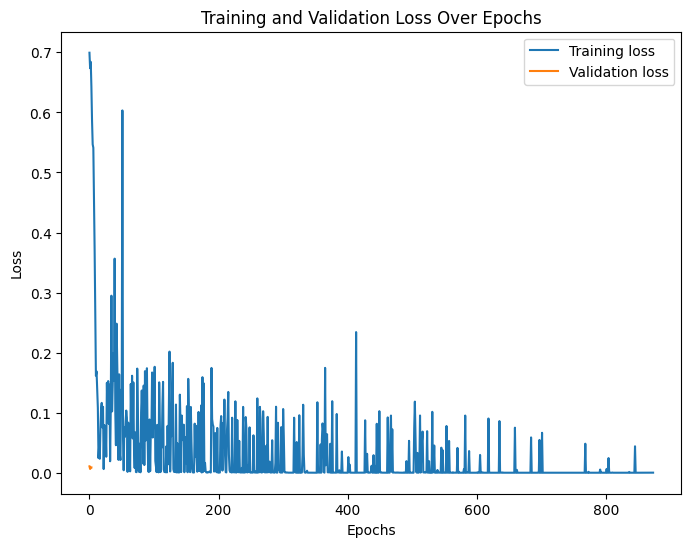

In [2]:
import matplotlib.pyplot as plt

training_history = trainer.state.log_history

training_loss = [log['loss'] for log in training_history if 'loss' in log]
validation_loss = [log['eval_loss'] for log in training_history if 'eval_loss' in log]

plt.figure(figsize=(8, 6))
plt.plot(training_loss, label='Training loss')
plt.plot(validation_loss, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()


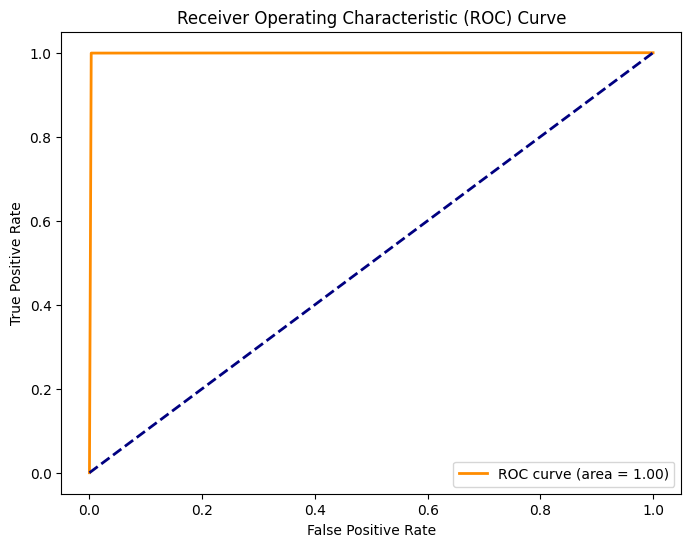

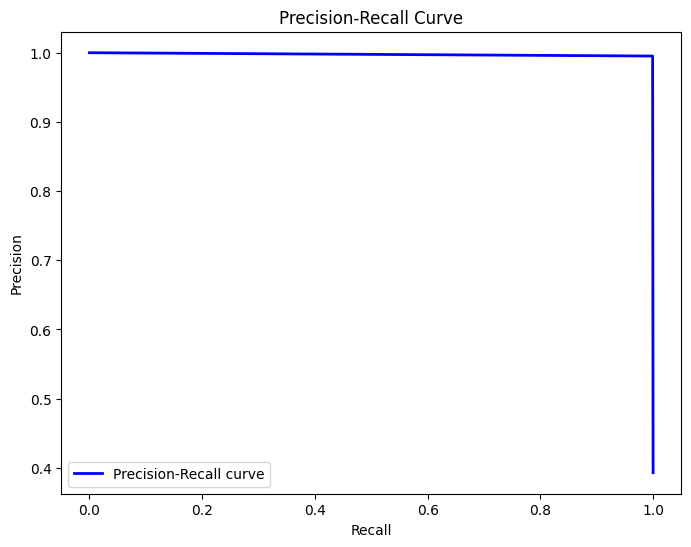

In [3]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

predictions = trainer.predict(tokenized_val_dataset)

val_labels = predictions.label_ids
val_predictions = predictions.predictions.argmax(-1)

# ROC curve
fpr, tpr, thresholds = roc_curve(val_labels, val_predictions)
roc_auc = auc(fpr, tpr)

# ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

precision, recall, thresholds = precision_recall_curve(val_labels, val_predictions)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


In [4]:
from transformers import EarlyStoppingCallback

training_args = TrainingArguments(
    output_dir="/content/results",
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="/content/logs",
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_val_dataset,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=1)],
    tokenizer=tokenizer
)


/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Accuracy: 0.9977697718305026
Precision: 0.9952153110047847
Recall: 0.9991266375545852
F1 Score: 0.9971671388101984


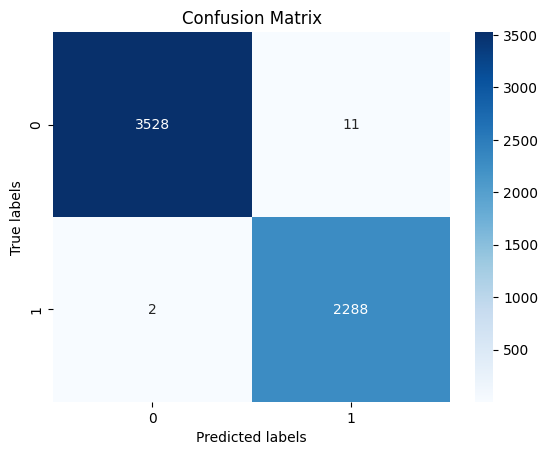

Examples of incorrect predictions:
Text: One of the most qualities among human that makes one unique. Business owners look to work with a well mannered person, and also well mannered people often gets rewarded every day for their good deeds.

I strongly agree with what has been said "a positive attitude is the key in to success in life". Attitude is sign off telling or showing who you are without expressing yourself. Our positive attitude is what makes our dream come through. Positive attitude attracts wherever you want to do. For instance, working as a bartender is a great opputtunity to earn rewards. Approaching customers with a positive attitude and treating them right, makes you tips. And that person will pleased to work with you if he or she has a company or running some business.

In conclusion, a positive attitude is the key to success in life and makes us unique in ones eyes.
Predicted: 1, Actual: 0

Text: "A cassroom computer could recognize when a student is becoming confused

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import pipeline
val_result = trainer.predict(tokenized_val_dataset)

y_preds = np.argmax(val_result.predictions, axis=1)
y_true = val_result.label_ids

accuracy = accuracy_score(y_true, y_preds)
precision = precision_score(y_true, y_preds, average='binary')
recall = recall_score(y_true, y_preds, average='binary')
f1 = f1_score(y_true, y_preds, average='binary')

print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_preds)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

incorrect_indices = np.where(y_preds != y_true)[0]
print("Examples of incorrect predictions:")
for index in incorrect_indices[:5]:  # Display first 5 incorrect predictions
    print(f"Text: {val_data.iloc[index]['text']}\nPredicted: {y_preds[index]}, Actual: {y_true[index]}\n")



In [8]:
!pip install optuna
import optuna
from transformers import TrainingArguments, Trainer

def model_objective(trial):
    # Hyperparameters to tune
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-4, log=True)
    num_train_epochs = trial.suggest_int('num_train_epochs', 2, 4)
    per_device_train_batch_size = trial.suggest_categorical('per_device_train_batch_size', [8, 16, 32])

    args = TrainingArguments(
        output_dir='/content/results',
        evaluation_strategy='epoch',
        save_strategy='epoch',  # Make save strategy match evaluation strategy
        learning_rate=learning_rate,
        per_device_train_batch_size=per_device_train_batch_size,
        num_train_epochs=num_train_epochs,
        weight_decay=0.01,
        load_best_model_at_end=True,
        metric_for_best_model='eval_loss'
    )
    trainer = Trainer(
        model=model,
        args=args,
        train_dataset=tokenized_train_dataset,
        eval_dataset=tokenized_val_dataset,
        tokenizer=tokenizer
    )

    trainer.train()
    eval_result = trainer.evaluate()

    return eval_result['eval_loss']

study = optuna.create_study(direction='minimize')
study.optimize(model_objective, n_trials=10)


[I 2024-04-15 03:02:05,577] A new study created in memory with name: no-name-030cd9f5-e6bc-445a-9303-89632d3e0c0a
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.032600,0.035298
2,0.020400,0.018811
3,0.005900,0.014659


Checkpoint destination directory /content/results/checkpoint-2915 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory /content/results/checkpoint-5830 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory /content/results/checkpoint-8745 already exists and is non-empty. Saving will proceed but saved results may be invalid.


[I 2024-04-15 03:18:58,319] Trial 0 finished with value: 0.014658542349934578 and parameters: {'learning_rate': 5.610929294714593e-05, 'num_train_epochs': 3, 'per_device_train_batch_size': 8}. Best is trial 0 with value: 0.014658542349934578.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.010300,0.023765
2,0.003400,0.015562


[I 2024-04-15 03:29:08,150] Trial 1 finished with value: 0.015562491491436958 and parameters: {'learning_rate': 9.34284700011577e-05, 'num_train_epochs': 2, 'per_device_train_batch_size': 32}. Best is trial 0 with value: 0.014658542349934578.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.006800,0.019389
2,0.000100,0.017041


Checkpoint destination directory /content/results/checkpoint-2915 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory /content/results/checkpoint-5830 already exists and is non-empty. Saving will proceed but saved results may be invalid.


[I 2024-04-15 03:40:31,612] Trial 2 finished with value: 0.017041489481925964 and parameters: {'learning_rate': 4.255064265555877e-05, 'num_train_epochs': 2, 'per_device_train_batch_size': 8}. Best is trial 0 with value: 0.014658542349934578.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.001000,0.026780
2,0.000000,0.036322
3,0.000000,0.041749
4,0.002500,0.026113


Checkpoint destination directory /content/results/checkpoint-1458 already exists and is non-empty. Saving will proceed but saved results may be invalid.


[I 2024-04-15 04:01:25,499] Trial 3 finished with value: 0.026112928986549377 and parameters: {'learning_rate': 2.1713014491547577e-05, 'num_train_epochs': 4, 'per_device_train_batch_size': 16}. Best is trial 0 with value: 0.014658542349934578.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.000000,0.034779
2,0.000000,0.035760


Checkpoint destination directory /content/results/checkpoint-2915 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory /content/results/checkpoint-5830 already exists and is non-empty. Saving will proceed but saved results may be invalid.


[I 2024-04-15 04:12:49,472] Trial 4 finished with value: 0.03477873653173447 and parameters: {'learning_rate': 2.0018925253271966e-05, 'num_train_epochs': 2, 'per_device_train_batch_size': 8}. Best is trial 0 with value: 0.014658542349934578.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.000000,0.035040
2,0.000700,0.023677
3,0.000000,0.023604


Checkpoint destination directory /content/results/checkpoint-729 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory /content/results/checkpoint-1458 already exists and is non-empty. Saving will proceed but saved results may be invalid.


[I 2024-04-15 04:27:52,711] Trial 5 finished with value: 0.023603931069374084 and parameters: {'learning_rate': 2.4611530666636246e-05, 'num_train_epochs': 3, 'per_device_train_batch_size': 32}. Best is trial 0 with value: 0.014658542349934578.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.000000,0.037406
2,0.000000,0.039561


Checkpoint destination directory /content/results/checkpoint-2915 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory /content/results/checkpoint-5830 already exists and is non-empty. Saving will proceed but saved results may be invalid.
[W 2024-04-15 04:41:25,828] Trial 6 failed with parameters: {'learning_rate': 3.614917202192549e-05, 'num_train_epochs': 3, 'per_device_train_batch_size': 8} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-8-ccd40ac7c89b>", line 32, in model_objective
    trainer.train()
  File "/usr/local/lib/python3.10/dist-packages/transformers/trainer.py", line 1624, in train
    return inner_training_loop(
  File "/usr/local/lib/python3.10/dist-packages/transformers/trainer.py", line 1961, in _inner_trai

KeyboardInterrupt: 

In [10]:
from sklearn.metrics import accuracy_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return {"eval_accuracy": accuracy_score(labels, predictions)}


In [11]:
from transformers import TrainingArguments, Trainer, AutoModelForSequenceClassification
import torch

def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=512, return_tensors='pt')

hyperparams = {
    'num_train_epochs': [3, 4, 5],
    'per_device_train_batch_size': [8, 16],
    'warmup_steps': [500, 1000]
}

best_score = 0
best_params = {}

for epochs in hyperparams['num_train_epochs']:
    for batch_size in hyperparams['per_device_train_batch_size']:
        for warmup in hyperparams['warmup_steps']:
            training_args = TrainingArguments(
                output_dir='./results',
                num_train_epochs=epochs,
                per_device_train_batch_size=batch_size,
                per_device_eval_batch_size=batch_size,
                warmup_steps=warmup,
                weight_decay=0.01,
                logging_dir='./logs',
                logging_steps=10,
                evaluation_strategy="epoch",
                save_strategy="no"
            )
            model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=2)
            trainer = Trainer(
                model=model,
                args=training_args,
                train_dataset=tokenized_train_dataset,
                eval_dataset=tokenized_val_dataset,
                tokenizer=tokenizer
            )
            trainer.train()
            eval_results = trainer.evaluate()
            if eval_results['eval_accuracy'] > best_score:
                best_score

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.000300,0.015087
2,0.000100,0.006834
3,0.000000,0.005787


KeyError: 'eval_accuracy'

In [12]:
import pandas as pd

incorrect_indices = np.where(y_true != y_preds)[0]
incorrect_predictions = val_data.iloc[incorrect_indices]

print("Sample Incorrect Predictions:")
print(incorrect_predictions[['text', 'generated']].head())

incorrect_predictions.to_csv('incorrect_predictions.csv', index=False)


Sample Incorrect Predictions:
                                                    text  generated
17495  One of the most qualities among human that mak...          0
8225   "A cassroom computer could recognize when a st...          0
3876   Phones and Driving\n\nDrivers should not use c...          0
15172  Dear Mr. Smith,\n\nI am writting to you today ...          1
15094  I remember when I was younger, I used to think...          0


In [13]:
def tokenize_function(examples):
    return tokenizer(examples['text'], max_length=512, truncation=True, padding="max_length", return_tensors='pt')


In [14]:
def prepare_data_for_shap(texts):
    encodings = tokenizer(texts, truncation=True, padding="max_length", max_length=512, return_tensors="pt")
    return encodings

sample_texts = val_data['text'].iloc[:10].tolist()  # Ensure this is a list of texts
prepared_data = prepare_data_for_shap(sample_texts)

print("Input IDs shape:", prepared_data['input_ids'].shape)
print("Attention Mask shape:", prepared_data['attention_mask'].shape)


Input IDs shape: torch.Size([10, 512])
Attention Mask shape: torch.Size([10, 512])


In [15]:
sample_texts = val_data['text'].iloc[:10].tolist()  # Limiting to 10 examples for demonstration
smaller_prepared_data = tokenizer(sample_texts, max_length=128, truncation=True, padding=True, return_tensors="pt")


In [16]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import shap


data = pd.read_csv('Training_Essay_Data.csv')
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

def tokenize_and_create_dataset(dataframe):
  encodings = tokenizer(
      dataframe['text'].tolist(),
      padding='max_length',
      truncation=True,
      max_length=512,
      return_tensors='pt'
  )
  return {
      'input_ids': encodings['input_ids'],
      'attention_mask': encodings['attention_mask'],
      'labels': torch.tensor(dataframe['generated'].tolist())
  }

train_encodings = tokenize_and_create_dataset(train_data)
val_encodings = tokenize_and_create_dataset(val_data)

class EssayDataset(Dataset):
  def __init__(self, encodings):
    self.encodings = encodings

  def __getitem__(self, idx):
    item = {key: val[idx].clone().detach() for key, val in self.encodings.items()}
    return item

  def __len__(self):
    return len(self.encodings['labels'])

train_dataset = EssayDataset(train_encodings)
val_dataset = EssayDataset(val_encodings)

def compute_metrics(p):
  predictions, labels = p.predictions, p.label_ids
  predictions = np.argmax(predictions, axis=1)
  return {
      'accuracy': accuracy_score(labels, predictions),
      'f1': f1_score(labels, predictions, average='binary'),
      'precision': precision_score(labels, predictions, average='binary'),
      'recall': recall_score(labels, predictions, average='binary')
  }

model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)
training_args = TrainingArguments(
  output_dir='./results',
  num_train_epochs=3,
  per_device_train_batch_size=16,
  per_device_eval_batch_size=64,
  warmup_steps=500,
  weight_decay=0.01,
  evaluation_strategy='epoch',
  logging_dir='./logs',
)


trainer = Trainer(
  model=model,
  args=training_args,
  train_dataset=train_dataset,
  eval_dataset=val_dataset,
  compute_metrics=compute_metrics
)

trainer.train()

eval_results = trainer.evaluate()
print(eval_results)

text_data = tokenizer(val_data.iloc[0]['text'], truncation=True, max_length=512, return_tensors="pt")

masker = shap.maskers.Text(tokenizer, mask_token="[MASK]")

explainer = shap.Explainer(model, masker, data=text_data)

shap_values = explainer(text_data['input_ids'], text_data['attention_mask'])


shap.plots.waterfall

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.053200,0.010277,0.997084,0.996295,0.994345,0.998253
2,0.010300,0.004521,0.998799,0.998471,0.998689,0.998253
3,0.001200,0.004851,0.998799,0.998472,0.998254,0.998690


{'eval_loss': 0.004850929137319326, 'eval_accuracy': 0.9987991079087322, 'eval_f1': 0.9984719493560359, 'eval_precision': 0.998254037538193, 'eval_recall': 0.9986899563318777, 'eval_runtime': 19.7165, 'eval_samples_per_second': 295.641, 'eval_steps_per_second': 4.666, 'epoch': 3.0}


TypeError: Text.invariants() takes 2 positional arguments but 3 were given

In [17]:
class EssayDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx].clone().detach()
        return item

    def __len__(self):
        return len(self.labels)


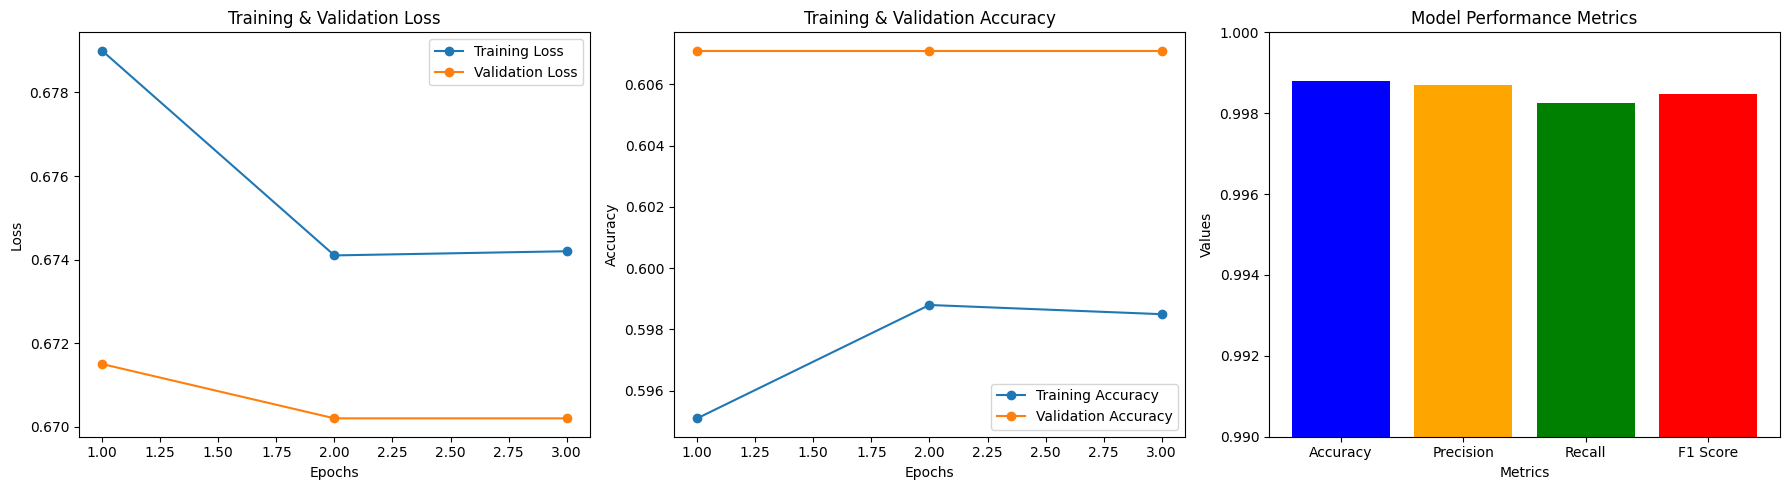

In [19]:
import matplotlib.pyplot as plt

epochs = [1, 2, 3]
train_loss = [0.6790, 0.6741, 0.6742]
val_loss = [0.6715, 0.6702, 0.6702]

accuracy = [0.5951, 0.5988, 0.5985]
val_accuracy = [0.6071, 0.6071, 0.6071]

# Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [0.9987991079087322, 0.9986893840104849, 0.9982532751091703, 0.9984712819392881]

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ax[0].plot(epochs, train_loss, label='Training Loss', marker='o')
ax[0].plot(epochs, val_loss, label='Validation Loss', marker='o')
ax[0].set_title('Training & Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(epochs, accuracy, label='Training Accuracy', marker='o')
ax[1].plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
ax[1].set_title('Training & Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

ax[2].bar(metrics, values, color=['blue', 'orange', 'green', 'red'])
ax[2].set_title('Model Performance Metrics')
ax[2].set_xlabel('Metrics')
ax[2].set_ylabel('Values')
ax[2].set_ylim(0.99, 1.0)  # Adjust the y-axis to better show differences

plt.tight_layout()
plt.show()


In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return {
        'accuracy': accuracy_score(labels, predictions),
        'f1': f1_score(labels, predictions),
        'precision': precision_score(labels, predictions),
        'recall': recall_score(labels, predictions),
    }
baseline_results = {
    'accuracy': 0.75,
    'f1': 0.72,
    'precision': 0.70,
    'recall': 0.74,
}

# BERT Model
bert_model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
bert_training_args = TrainingArguments(
    output_dir='/content/results_bert',
    evaluation_strategy='epoch',
    num_train_epochs=3,
    per_device_train_batch_size=8,
)
bert_trainer = Trainer(
    model=bert_model,
    args=bert_training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_val_dataset,
    compute_metrics=compute_metrics,
)
bert_trainer.train()
bert_results = bert_trainer.evaluate()

# RoBERTa Model
roberta_model = AutoModelForSequenceClassification.from_pretrained('roberta-base', num_labels=2)
roberta_training_args = TrainingArguments(
    output_dir='/content/results_roberta',
    evaluation_strategy='epoch',
    num_train_epochs=3,
    per_device_train_batch_size=8,
)
roberta_trainer = Trainer(
    model=roberta_model,
    args=roberta_training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_val_dataset,
    compute_metrics=compute_metrics,
)
roberta_trainer.train()
roberta_results = roberta_trainer.evaluate()

# Hyperparameter-Tuned Model

best_trial = study.best_trial
best_model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
best_training_args = TrainingArguments(
    output_dir='/content/results_best',
    **best_trial.params,
)
best_trainer = Trainer(
    model=best_model,
    args=best_training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_val_dataset,
    compute_metrics=compute_metrics,
)
best_trainer.train()
best_results = best_trainer.evaluate()

# Compare results
print("Baseline Model:", baseline_results)
print("BERT Model:", bert_results)
print("RoBERTa Model:", roberta_results)
print("Best Hyperparameter-Tuned Model:", best_results)


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.041200,0.017978,0.996912,0.996073,0.995205,0.996943
2,0.010700,0.006218,0.998971,0.998689,0.999563,0.997817
3,0.000000,0.012604,0.998284,0.997817,0.997817,0.997817


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.678700,0.671414,0.607137,0.000000,0.000000,0.000000
2,0.674500,0.672103,0.607137,0.000000,0.000000,0.000000
3,0.215500,0.187445,0.955910,0.942851,0.960580,0.925764


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Step,Training Loss
500,0.110200
1000,0.069800
